In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/UTR3_zinb_norm_singleref_2023-05-23.csv")
df

,seq,cell_type,replicate,1,2,3,4,fold
0,TGCAGTTTTGACCTCCCAGGCTCAAGCGATCCTCCTGCCTCAGCCT...,c1,1,34.001595,36.508430,40.677618,38.609149,val
1,TGCAGTTTTGACCTCCCAGGCTCAAGCGATCCTCCTGCCTCAGCCT...,c13,1,37.814993,30.605211,32.915050,38.822784,val
2,TGCAGTTTTGACCTCCCAGGCTCAAGCGATCCTCCTGCCTCAGCCT...,c13,2,35.405242,34.814190,42.457110,34.844234,val
3,TGCAGTTTTGACCTCCCAGGCTCAAGCGATCCTCCTGCCTCAGCCT...,c17,1,21.945857,36.076924,62.723318,25.114635,val
4,TGCAGTTTTGACCTCCCAGGCTCAAGCGATCCTCCTGCCTCAGCCT...,c17,2,19.848040,34.344834,35.704787,42.941895,val
...,...,...,...,...,...,...,...,...
284255,AGGAGGCAACTGTGGCATTGCTTCCTTAACCAGCTCATGGTGTGTG...,c2,1,16.681219,17.265491,24.870626,31.894351,train
284256,AGGAGGCAACTGTGGCATTGCTTCCTTAACCAGCTCATGGTGTGTG...,c2,2,11.830815,14.474656,25.995486,31.014359,train
284257,AGGAGGCAACTGTGGCATTGCTTCCTTAACCAGCTCATGGTGTGTG...,c4,1,22.047422,22.100465,12.389592,21.549536,train
284258,AGGAGGCAACTGTGGCATTGCTTCCTTAACCAGCTCATGGTGTGTG...,c6,1,12.588212,24.466552,23.619147,44.524552,train


In [3]:
df = df.groupby(by=["seq", "cell_type", "fold"])[["1", "2", "3", "4"]].sum().reset_index()

In [4]:
# df = df[df["cell_type"].isin({"c1", "c4", "c17"})].reset_index(drop=True)

In [5]:
bins = np.arange(1, 5)
cpm = df[["1", "2", "3", "4"]]
mass_center = (cpm * bins).sum(axis=1) / cpm.sum(axis=1)
mass_center

0         3.105728
1         2.628650
2         2.865176
3         2.739573
4         3.121235
            ...   
170551    2.761276
170552    2.703607
170553    2.397593
170554    2.872536
170555    2.512695
Length: 170556, dtype: float64

In [6]:
df.insert(7, "mass_center", mass_center)
df

,seq,cell_type,fold,1,2,3,4,mass_center
0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c1,train,6.809279,5.843161,5.836944,23.948600,3.105728
1,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c13,train,42.009822,34.532234,32.334772,56.966098,2.628650
2,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c17,train,50.033644,45.049730,54.291393,110.129539,2.865176
3,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c2,train,26.001559,44.713552,22.349163,57.504485,2.739573
4,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c4,train,12.116972,26.338286,33.479228,67.473281,3.121235
...,...,...,...,...,...,...,...,...
170551,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c13,train,20.230416,15.444105,17.989054,34.789154,2.761276
170552,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c17,train,50.443141,46.962936,78.430440,73.845290,2.703607
170553,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c2,train,25.691550,24.562474,16.716270,22.217946,2.397593
170554,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c4,train,12.025867,17.908212,22.000636,31.344779,2.872536


In [7]:
mass_center_mean = df.groupby(by=["seq"])["mass_center"].mean().loc[df["seq"]].reset_index(drop=True)
mass_center_mean

0         2.860766
1         2.860766
2         2.860766
3         2.860766
4         2.860766
            ...   
170551    2.669052
170552    2.669052
170553    2.669052
170554    2.669052
170555    2.669052
Name: mass_center, Length: 170556, dtype: float64

In [8]:
mass_center_std = df.groupby(by=["seq"])["mass_center"].std().loc[df["seq"]].reset_index(drop=True)
mass_center_std

0         0.210208
1         0.210208
2         0.210208
3         0.210208
4         0.210208
            ...   
170551    0.178191
170552    0.178191
170553    0.178191
170554    0.178191
170555    0.178191
Name: mass_center, Length: 170556, dtype: float64

In [9]:
df.insert(8, "mass_center_mean", mass_center_mean)
df.insert(9, "mass_center_std", mass_center_std)
df

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,mass_center_std
0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c1,train,6.809279,5.843161,5.836944,23.948600,3.105728,2.860766,0.210208
1,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c13,train,42.009822,34.532234,32.334772,56.966098,2.628650,2.860766,0.210208
2,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c17,train,50.033644,45.049730,54.291393,110.129539,2.865176,2.860766,0.210208
3,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c2,train,26.001559,44.713552,22.349163,57.504485,2.739573,2.860766,0.210208
4,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c4,train,12.116972,26.338286,33.479228,67.473281,3.121235,2.860766,0.210208
...,...,...,...,...,...,...,...,...,...,...
170551,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c13,train,20.230416,15.444105,17.989054,34.789154,2.761276,2.669052,0.178191
170552,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c17,train,50.443141,46.962936,78.430440,73.845290,2.703607,2.669052,0.178191
170553,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c2,train,25.691550,24.562474,16.716270,22.217946,2.397593,2.669052,0.178191
170554,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c4,train,12.025867,17.908212,22.000636,31.344779,2.872536,2.669052,0.178191


In [10]:
diffs = (df["mass_center"] - df["mass_center_mean"])
zscores = diffs / df["mass_center_std"]

In [11]:
df.insert(9, "diff", diffs)
df.insert(10, "zscore", zscores)
df

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,diff,zscore,mass_center_std
0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c1,train,6.809279,5.843161,5.836944,23.948600,3.105728,2.860766,0.244962,1.165330,0.210208
1,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c13,train,42.009822,34.532234,32.334772,56.966098,2.628650,2.860766,-0.232116,-1.104220,0.210208
2,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c17,train,50.033644,45.049730,54.291393,110.129539,2.865176,2.860766,0.004410,0.020978,0.210208
3,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c2,train,26.001559,44.713552,22.349163,57.504485,2.739573,2.860766,-0.121193,-0.576539,0.210208
4,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAATTTCCATGGCTAACTA...,c4,train,12.116972,26.338286,33.479228,67.473281,3.121235,2.860766,0.260469,1.239099,0.210208
...,...,...,...,...,...,...,...,...,...,...,...,...
170551,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c13,train,20.230416,15.444105,17.989054,34.789154,2.761276,2.669052,0.092224,0.517556,0.178191
170552,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c17,train,50.443141,46.962936,78.430440,73.845290,2.703607,2.669052,0.034555,0.193919,0.178191
170553,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c2,train,25.691550,24.562474,16.716270,22.217946,2.397593,2.669052,-0.271460,-1.523421,0.178191
170554,TTTTTTTTTTTTTTTTTTTTTTTTGGTGTGTGTGTGTGTGTGTGTG...,c4,train,12.025867,17.908212,22.000636,31.344779,2.872536,2.669052,0.203483,1.141940,0.178191


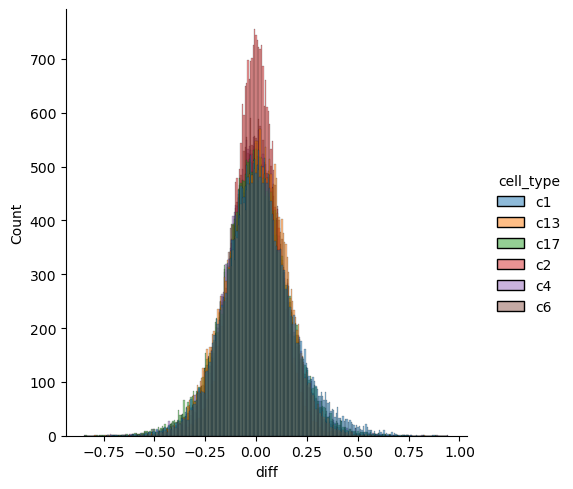

In [12]:
sns.displot(x=df["diff"], hue=df["cell_type"])

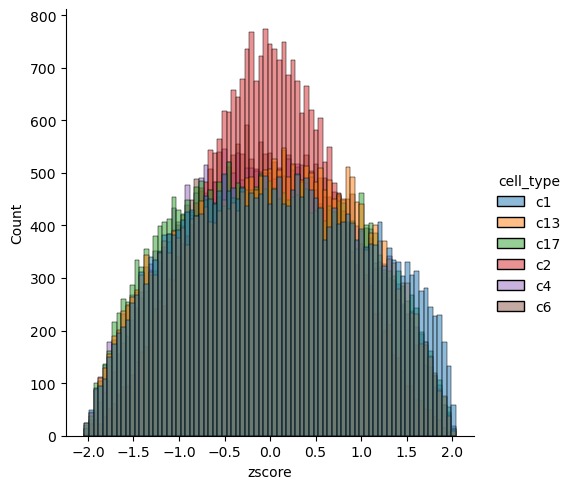

In [13]:
sns.displot(x=df["zscore"], hue=df["cell_type"])

In [14]:
df.to_csv("UTR3_zscores_replicateagg.csv", index=False)